In [1]:
import scanpy as sc
import os

In [2]:
data_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata"
adata = sc.read_h5ad(os.path.join(data_dir,"adata_scvi.h5ad"))

In [3]:
adata

AnnData object with n_obs × n_vars = 152319 × 18088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_MDE', 'X_scVI', 'X_scvi_MDE'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs["celltypist_labels_Immune_All_High_highconf"] = "unknown"
mask = adata.obs["celltypist_scores_Immune_All_High"] > 0.95
adata.obs.loc[mask, "celltypist_labels_Immune_All_High_highconf"] = adata.obs.loc[mask, "celltypist_labels_Immune_All_High"]

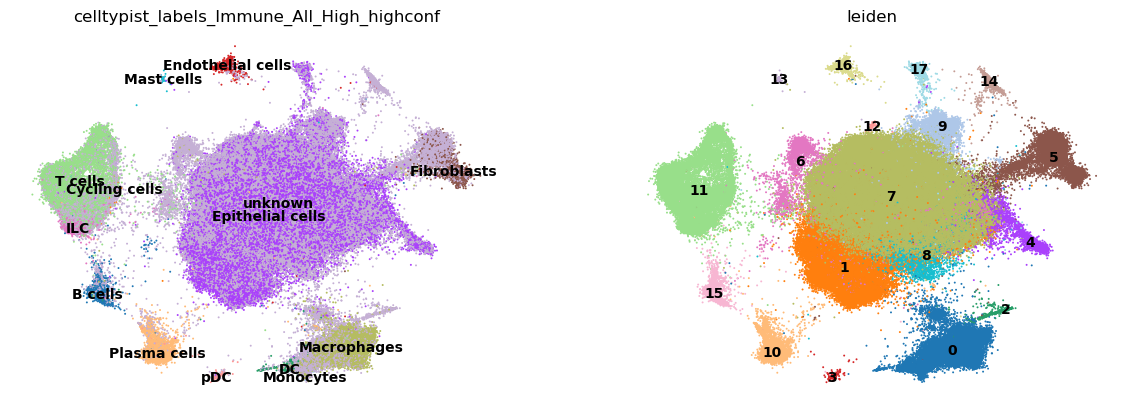

In [7]:
sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["celltypist_labels_Immune_All_High_highconf", "leiden"],
    legend_loc="on data",
    frameon=False,
    ncols=2,use_raw = False, cmap = "viridis", size = 8)

In [44]:
sc.tl.rank_genes_groups(adata, groupby = "leiden", method = 't-test', useraw = False)

In [45]:
markers =sc.get.rank_genes_groups_df(adata, group = None)

In [46]:
markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,TYROBP,328.006165,7.234827,0.0,0.0
1,0,CD74,314.605103,5.249832,0.0,0.0
2,0,HLA-DRA,303.156067,5.971874,0.0,0.0
3,0,FCER1G,261.101257,6.925879,0.0,0.0
4,0,FTL,255.380524,3.756076,0.0,0.0


In [68]:
markers_fil = markers[markers.pvals_adj < 0.001].sort_values('logfoldchanges', ascending=False).groupby('group',observed=True).head(20)

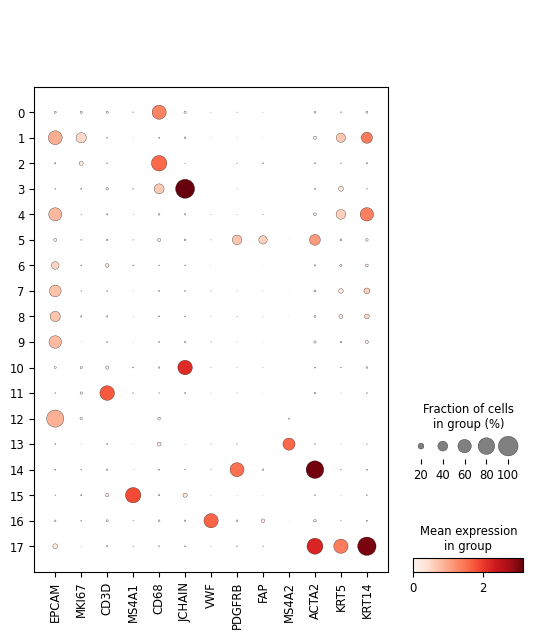

In [81]:
# "EPCAM","CDH1" epithelial
# "MKI67" proliferative
# "CD3D", T cells
# "MS4A1" B cells
# JCHAIN plasma cells
# "CD68","CD14", "ITGAX" macrophages
# "PECAM1","VWF" endothelial
# "PDGFRB","FAP" fibroblasts
# MS4A2 Mast/Basophiphs cells

general_markers  = ["EPCAM","MKI67", "CD3D", "MS4A1", "CD68","JCHAIN", "VWF", "PDGFRB","FAP","MS4A2","ACTA2", "KRT5", "KRT14"]


sc.pl.dotplot(adata=adata, var_names=general_markers, groupby="leiden")

In [82]:
rename_dict = {"0": "Myeloid",
                "1": "Cycling cells",
               "2": "Myeloid",
               "3": "Myeloid",
               "4": "Epithelial",
               "5": "Mesenchymal",
               "6": "Epithelial",
               "7": "Epithelial",
               "8": "Epithelial",
               "9": "Epithelial",
               "10": "Plasma cells",
               "11": "T cells",
               "12": "Epithelial",
               "13": "Mast cells",
               "14": "Mesenchymal",
               "15": "B cells", 
               "16": "Endothelial",
               "17": "Epithelial",
               }
#adata.obs['GenAnno'] = adata.obs['leiden'].replace(rename_dict)
adata.obs['GenAnno'] = adata.obs['leiden'].map(rename_dict).astype('category')
adata.obs['GenAnno'].info()
adata.obs['GenAnno'].value_counts()

<class 'pandas.core.series.Series'>
Index: 152319 entries, AAACCTGAGAAACCGC-1-PM0337- to TTTGTCATCCTGTACC-1-MH0126-
Series name: GenAnno
Non-Null Count   Dtype   
--------------   -----   
152319 non-null  category
dtypes: category(1)
memory usage: 5.3+ MB


GenAnno
Epithelial       76110
Cycling cells    19636
T cells          19416
Myeloid          15970
Mesenchymal      11073
Plasma cells      4870
B cells           2851
Endothelial       2013
Mast cells         380
Name: count, dtype: int64

In [20]:
cells_ct = adata.obs.celltypist_labels_Immune_All_High_highconf.cat.categories.to_list()

In [21]:
d1=dict.fromkeys(cells_ct,"unkown")

In [22]:
d1

{'B cells': 'unkown',
 'Cycling cells': 'unkown',
 'DC': 'unkown',
 'Endothelial cells': 'unkown',
 'Epithelial cells': 'unkown',
 'Fibroblasts': 'unkown',
 'ILC': 'unkown',
 'Macrophages': 'unkown',
 'Mast cells': 'unkown',
 'Monocytes': 'unkown',
 'Plasma cells': 'unkown',
 'T cells': 'unkown',
 'pDC': 'unkown',
 'unknown': 'unkown'}

In [16]:
adata.obs.GenAnno.cat.categories

Index(['B cells', 'Cycling cells', 'Endothelial', 'Epithelial', 'Mast cells',
       'Mesenchymal', 'Myeloid', 'Plasma cells', 'T cells', 'unkown'],
      dtype='object')

In [74]:
mapping_dict = {
 'B cells': 'B cells',
 'Cycling cells': 'Cycling cells',
 'DC': 'Myeloid',
 'Endothelial cells': 'Endothelial',
 'Epithelial cells': 'Epithelial',
 'Fibroblasts': 'Mesenchymal',
 'ILC': 'T cells',
 'Macrophages': 'Myeloid',
 'Mast cells': 'Mast cells',
 'Monocytes': 'Myeloid',
 'Plasma cells': 'Plasma cells',
 'T cells': 'T cells',
 'pDC': 'Myeloid',
 'unknown': 'unkown'}

In [83]:
adata.obs["celltypist_mapped"] = adata.obs["celltypist_labels_Immune_All_High_highconf"].map(mapping_dict)

In [84]:
mask = (adata.obs["celltypist_mapped"] == (adata.obs["GenAnno"])) | (adata.obs['GenAnno'] == 'Cycling cells')

In [85]:
adata.obs['GenAnnoHighConf'] = adata[mask, :].obs.GenAnno

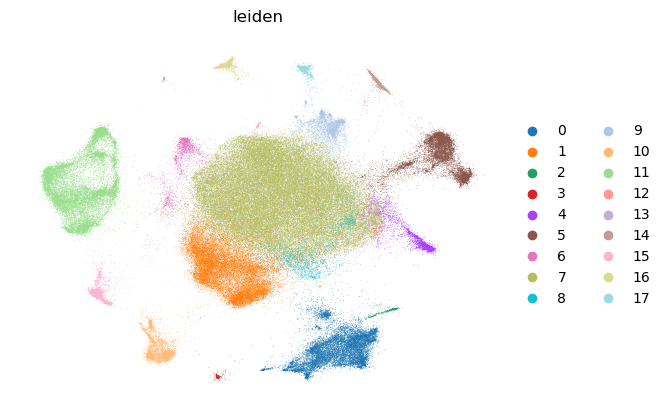

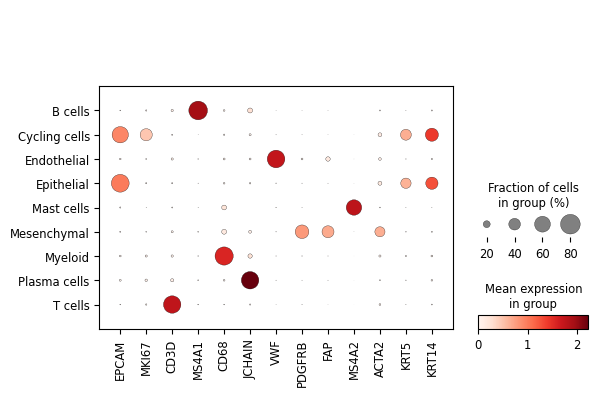

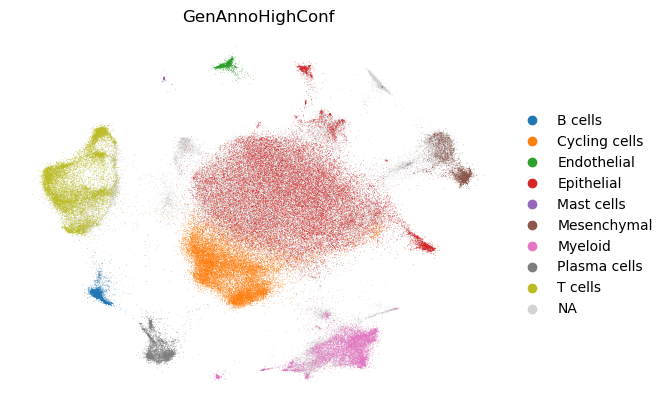

In [86]:
# Renombrar los valores en la columna deseada

sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["leiden"],
    frameon=False, 
    #legend_loc="on data",
    ncols=1,
)
sc.pl.dotplot(adata=adata, var_names=general_markers, groupby="GenAnnoHighConf")

sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["GenAnnoHighConf"],
    frameon=False, 
    #legend_loc="on data",
    ncols=1,
)



In [87]:
adata.write_h5ad(os.path.join(data_dir,"adata_GenAnnoHighConf.h5ad"))